In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

df_train = pd.read_excel("OJ_data.xlsx", 'train')
df_test = pd.read_excel("OJ_data.xlsx", 'test')
df_validate = pd.read_excel("OJ_data.xlsx", 'validate')

y_train = df_train["label"]
y_test = df_test["label"]
y_validate = df_validate["label"]

X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
X_validate = df_validate.iloc[:, :-1]

Tự nhiên 0 nhân tạo 1

In [180]:
X_train.shape, X_test.shape, X_validate.shape

((45, 611), (13, 611), (5, 611))

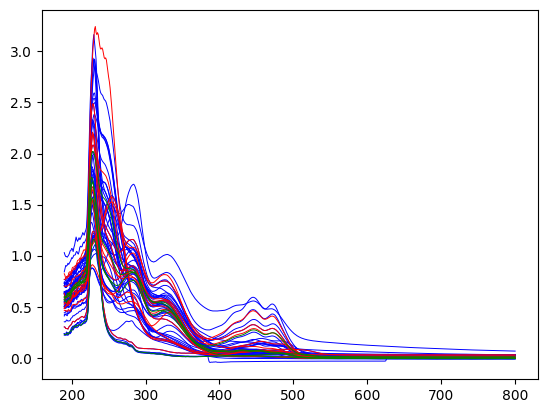

In [181]:
plt.plot(X_train.T, c='b', linewidth=0.7)
plt.plot(X_test.T, c='r', linewidth=0.7)
plt.plot(X_validate.T, c='g', linewidth=0.7)
plt.show()

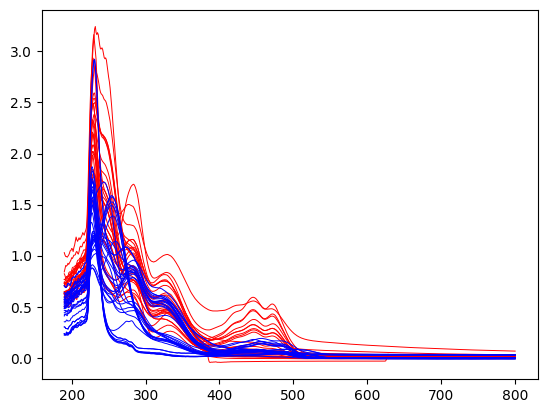

In [182]:
full_df = pd.concat((df_train, df_test, df_validate), axis=0)
unq = np.unique(y_train)
colors = ['red', 'blue']
cmap = ListedColormap(colors)
for label in unq:
    df = full_df.loc[full_df["label"]==label].iloc[:, :-1]
    plt.plot(df.T, c=cmap(label), linewidth=0.7)
plt.show()

In [183]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

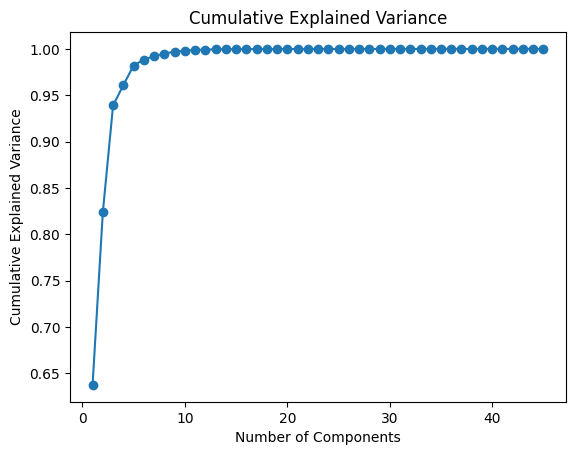

In [184]:
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [185]:
for i in range (1, 11):
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_validate_pca = pca.transform(X_validate_scaled)
    # Tạo mô hình Naive Bayes
    NB = GaussianNB().fit(X_train_pca, y_train)
    y_pred = NB.predict(X_validate_pca)
    print(f"{i}PC, accuracy={accuracy_score(y_validate, y_pred)}")

1PC, accuracy=0.6
2PC, accuracy=0.8
3PC, accuracy=1.0
4PC, accuracy=1.0
5PC, accuracy=1.0
6PC, accuracy=1.0
7PC, accuracy=1.0
8PC, accuracy=1.0
9PC, accuracy=1.0
10PC, accuracy=1.0


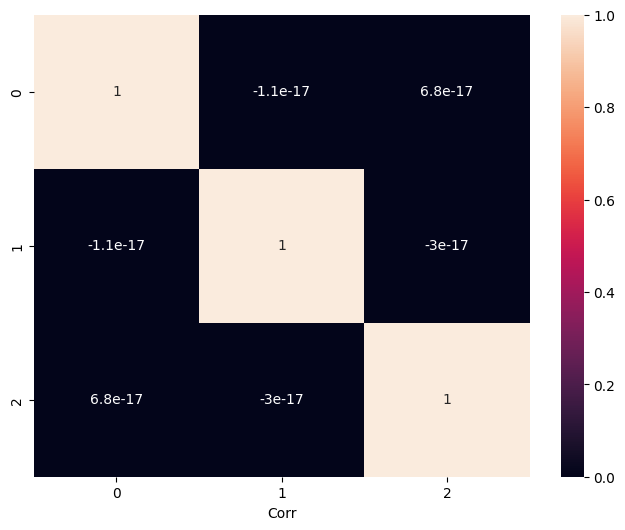

In [186]:
import seaborn as sns
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

figure = plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_train_pca).corr(), annot=True)
plt.xlabel('Corr')
plt.show()

In [187]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_pca, y_train)
LR.predict(X_test_pca)
LR.score(X_test_pca, y_test)

0.8461538461538461

In [188]:
# plt.hist(X_train_pca[:, 3])

Accuracy=1.0


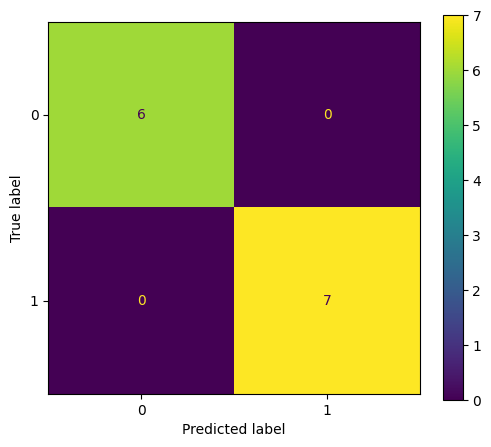

In [189]:
NB = GaussianNB().fit(X_train_pca, y_train)
y_pred = NB.predict(X_test_pca)
print(f"Accuracy={accuracy_score(y_test, y_pred)}")

cm=confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()